### Comparison between the two optimization methods proposed  in the article: The descent-ascent procedure and the minmax swapping procedure.

##### Import modules and functions

In [1]:
import pandas as pd
import numpy as np
import time
from CytOpT import CytOpt
from CytOpT import CytOpt_plot

##### Import data

In [2]:
#Source Data

Stanford1A_values = pd.read_csv('../Data/W2_1_values.csv',
                                 usecols = np.arange(1,8))
Stanford1A_clust = pd.read_csv('../Data/W2_1_clust.csv',
                                usecols = [1])

#Target Data

Stanford3A_values = pd.read_csv('../Data/W2_7_values.csv',
                                 usecols = np.arange(1,8))
Stanford3A_clust = pd.read_csv('../Data/W2_7_clust.csv',
                                usecols = [1])

We are in the frame work where our cytometry data are divided into 10 classes and the 7 markers available are used to estimate the class proportions in the target data set.

##### Preprocessing of the data sets

In [3]:
X_source = np.asarray(Stanford1A_values)
X_target = np.asarray(Stanford3A_values)

Lab_source = np.asarray(Stanford1A_clust['x'])
Lab_target = np.asarray(Stanford3A_clust['x'])

#####  Computation of the benchmark proportions $p$ in the target data set

In [4]:
h_target = np.zeros(10)
for k in range(10):
    h_target[k] = np.sum(Lab_target == k+1)/len(Lab_target)

print(h_target)

[0.017004   0.12873617 0.048482   0.05748411 0.00909037 0.00232408
 0.33146034 0.28171334 0.10208284 0.02162273]


### ${\tt CytOpt}$ to compute an estimate $\hat{p}$ of the class proportions.

##### Estimation with the minmax swapping procedure

Setting of the parameters

In [5]:
lbd = 0.0001
eps_one = 0.0001
n_iter = 10000
step_size = 5
power = 0.99

In [6]:
t0 = time.time()

res_one = CytOpt.CytOpT(X_source, X_target, Lab_source, theta_true=h_target,
                             method="minmax",lbd=lbd,eps=eps_one,n_iter=n_iter,step=step_size,power=power)
elapsed_time = time.time() - t0
print('Elapsed time : ',elapsed_time/60, 'Mins')

Done ( 72.53941559791565 s)

Elapsed time :  1.2091620246569315 Mins


In [7]:
res_one

{'proportions':    Gold_standard    minmax
 0       0.017004  0.042817
 1       0.128736  0.102530
 2       0.048482  0.033375
 3       0.057484  0.072495
 4       0.009090  0.006437
 5       0.002324  0.007953
 6       0.331460  0.354137
 7       0.281713  0.200944
 8       0.102083  0.168836
 9       0.021623  0.010475,
 'monitoring':         minmax
 0     0.000000
 1     0.905097
 2     0.804237
 3     0.597057
 4     0.155769
 ...        ...
 9995  0.060992
 9996  0.060966
 9997  0.060867
 9998  0.061053
 9999  0.061026
 
 [10000 rows x 1 columns]}

In [8]:
Kull_Monitoring  = res_one['monitoring']

##### Estimation with the descent-ascent procedure

In [9]:
n_it_grad = 10000
n_it_sto = 10
pas_grad = 10
eps=0.0005

In [10]:
t0 = time.time()

res_two = CytOpt.CytOpT(X_source, X_target, Lab_source, theta_true=h_target,
                             method="desasc",n_it_grad=n_it_grad,n_it_sto=n_it_sto,step_grad=pas_grad,eps=eps)
elapsed_time = time.time() - t0
print('Elapsed time : ',elapsed_time/60, 'Mins')


 Epsilon:  0.0005
Iteration  0
Current h_hat
[0.100512   0.10000528 0.09935306 0.10063809 0.10095436 0.09835122
 0.10050735 0.09999323 0.09995347 0.09973194]
Iteration  100
Current h_hat
[0.10913227 0.11362439 0.11027089 0.12445822 0.07117211 0.02275205
 0.13323605 0.12754418 0.12486747 0.06294236]
Iteration  200
Current h_hat
[0.10816657 0.1064646  0.1051463  0.11091844 0.05086353 0.01649452
 0.17665272 0.14367862 0.12874749 0.0528672 ]
Iteration  300
Current h_hat
[0.0980474  0.10725596 0.08641139 0.09860752 0.04252913 0.01504809
 0.20016336 0.16860002 0.13571634 0.04762079]
Iteration  400
Current h_hat
[0.09566957 0.10508335 0.06449744 0.08825593 0.03422899 0.01193693
 0.23386136 0.16952623 0.15360536 0.04333485]
Iteration  500
Current h_hat
[0.08919761 0.10103839 0.06057742 0.08595618 0.02994994 0.01070027
 0.24414984 0.17602315 0.16443088 0.03797632]
Iteration  600
Current h_hat
[0.08604832 0.1000732  0.05686983 0.07733062 0.02970741 0.0101486
 0.28237667 0.1811204  0.14099036 0.

Iteration  5800
Current h_hat
[0.04684471 0.10171229 0.03807736 0.07131378 0.01438742 0.00441228
 0.35207378 0.20427885 0.15244845 0.01445107]
Iteration  5900
Current h_hat
[0.044169   0.09709717 0.03547856 0.0714836  0.01404583 0.00423446
 0.38242902 0.20334628 0.13389777 0.01381831]
Iteration  6000
Current h_hat
[0.04650869 0.1033047  0.03835332 0.07849653 0.01564431 0.00447765
 0.30053558 0.23400185 0.16436208 0.01431528]
Iteration  6100
Current h_hat
[0.04538669 0.1054717  0.03681064 0.08165841 0.01544203 0.00435627
 0.31166168 0.23343244 0.15167406 0.01410609]
Iteration  6200
Current h_hat
[0.04749318 0.11018804 0.03734451 0.07696891 0.01572599 0.00429647
 0.3158821  0.22352004 0.15382356 0.0147572 ]
Iteration  6300
Current h_hat
[0.04622849 0.10637457 0.03786609 0.07047956 0.01553386 0.00411924
 0.3171789  0.25531138 0.13191356 0.01499435]
Iteration  6400
Current h_hat
[0.04363619 0.10040233 0.03566366 0.06570889 0.0146616  0.00398735
 0.33688458 0.25284952 0.13181776 0.01438812]

In [11]:
proportions = pd.concat([res_one['proportions'], res_two['proportions']], axis=1)
proportions

,Gold_standard,minmax,Gold_standard,desasc
0,0.017004,0.042817,0.017004,0.046477
1,0.128736,0.102530,0.128736,0.123336
2,0.048482,0.033375,0.048482,0.032266
3,0.057484,0.072495,0.057484,0.059977
4,0.009090,0.006437,0.009090,0.014980
5,0.002324,0.007953,0.002324,0.003707
6,0.331460,0.354137,0.331460,0.352765
7,0.281713,0.200944,0.281713,0.198802
8,0.102083,0.168836,0.102083,0.154128
9,0.021623,0.010475,0.021623,0.013564


In [12]:
monitoring = pd.concat([res_one['monitoring'], res_two['monitoring']], axis=1)
monitoring

,minmax,desasc
0,0.000000,0.819224
1,0.905097,0.794142
2,0.804237,0.773088
3,0.597057,0.766712
4,0.155769,0.764075
...,...,...
9995,0.060992,0.049307
9996,0.060966,0.049706
9997,0.060867,0.050722
9998,0.061053,0.050826


### Results of the two optimization procedures

We display the evolution of the Kullback-Leibler divergence between $\hat{p}$ and $p$, along the iterations of the two minimization procedures.

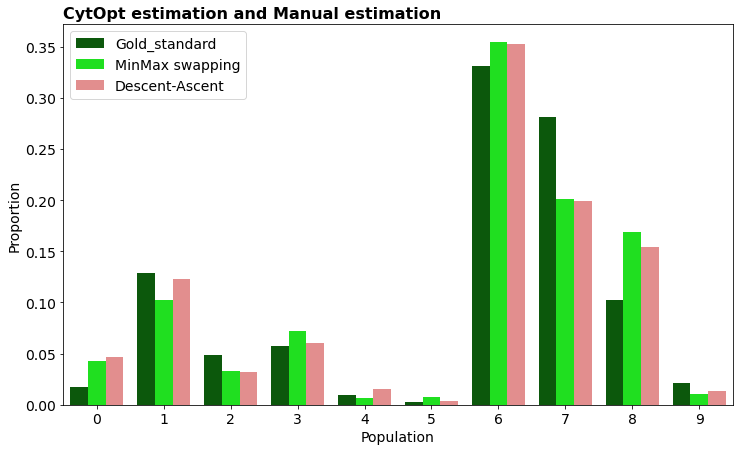

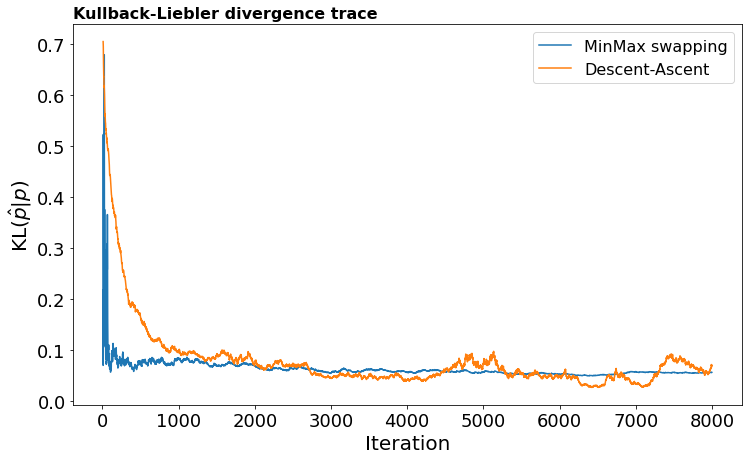

In [13]:
CytOpt_plot.bar_plot(proportions)
CytOpt_plot.KL_plot(monitoring, n_0=10, n_stop=8000)